# K-means clustering
### Objective of the analysis
In the below code, we will use the K-mean clustering algorithm to cluster colours of an image. We will look for a proper number of clusters in order to reduce the number of the image's colours and to simplify it.

In [2]:
%config InlineBackend.figure_formats = ['retina']
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

### Loading the data - the image


(-0.5, 499.5, 374.5, -0.5)

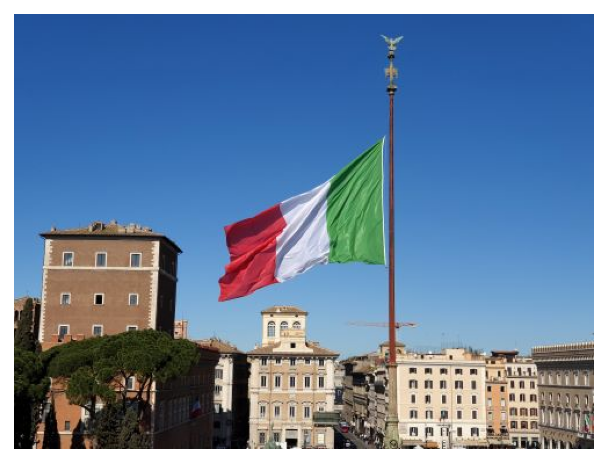

In [3]:
photo = plt.imread('bandiera_small.jpg')
plt.imshow(photo)
plt.axis('off')

Below, we create a helper function which we will use to get the details of the image and preprocess it adequately.

In [4]:
def preprocess_image(img):
    array_shape = img.shape
    px_num = array_shape[0] * array_shape[1]
    reshaped = img.reshape(px_num, 3)
    return array_shape, px_num, reshaped

### Data exploration and description

In [5]:
initial_shape, px_num, photo_reshaped = preprocess_image(photo)
initial_shape, px_num

((375, 500, 3), 187500)

In [6]:
photo[:3]

array([[[ 31,  81, 154],
        [ 31,  81, 154],
        [ 31,  81, 154],
        ...,
        [ 33,  83, 152],
        [ 33,  83, 152],
        [ 33,  83, 152]],

       [[ 31,  81, 154],
        [ 31,  81, 154],
        [ 31,  81, 154],
        ...,
        [ 33,  83, 152],
        [ 33,  83, 152],
        [ 33,  83, 152]],

       [[ 31,  81, 154],
        [ 31,  81, 154],
        [ 32,  82, 155],
        ...,
        [ 34,  84, 155],
        [ 34,  84, 155],
        [ 34,  84, 155]]], dtype=uint8)

Our input data consists in a picture that is represented by a numpy 3-dimensional array.

Each inner array represents one pixel and it contains three numbers (which are the RGB values corresponding for red, green, and blue, which all together produce a specific colour), that represent the pixel's colour.

The dimentions of our image is 375x500 pixels, which means that it is composed of 187500 pixels.

The helper function used above returned the reshaped array (as the third item) as a 2D array where each represtents now a single pixel.

We will create a set where each element will be a unique colour that is present on our photo. Checking its length, we will know how many unique colours the image consists of.

In [7]:
photo_reshaped[:3]

array([[ 31,  81, 154],
       [ 31,  81, 154],
       [ 31,  81, 154]], dtype=uint8)

In [8]:
colours = set([tuple(pixel) for pixel in photo_reshaped])
len(colours)

44918

As ddemonstrated above, our picture consists of 44,918 unique colours. In the following steps, we will significantly reduce this number and we will observe which number of colours will simplify it, still preserving the picture's main features.

### K-means clustering with various number of clusters
We create a function that takes as the parameters the initial array with the picture's data (pixels colours) and the number of clusters we want to have. It will perform the K-Means algorithm and return a simplified image (with a reduced number of colours) along with the corresponding inertia.

In [9]:
def cluster_img(img, k_num):
    flatten_img = preprocess_image(img)[2]
    flatten_img_copy = flatten_img.copy()
    
    kmeans = KMeans(n_clusters=k_num).fit(flatten_img)
    
    for label in np.unique(kmeans.labels_):
        flatten_img_copy[kmeans.labels_==label, :] = kmeans.cluster_centers_[label]
    
    img_simplified = flatten_img_copy.reshape(img.shape)
    return img_simplified, kmeans.inertia_

We run the above function with different k_num parameter (number of clusters) in order to see what number will work best for us, i.e. which one will result in a simplified number of colours but will not exaggeratedly reduce the image quality from the point of view of the details on the picture.

We try number of clusters ranging from 2 un to 20 (included).

In [10]:
clusters_num = list(range(2,22,2))
simplified_photos = []
inertia = []

for num in clusters_num:
    pho, ine = cluster_img(photo, num)
    simplified_photos.append(pho)
    inertia.append(ine) 

Firstly, we want to see the inertia for different number of clusters (clusters_num) and determine its optimal value. To do so, we use two arrays: clusters_num and inertia that we obtained in the previous step.

Text(0, 0.5, 'Inertia')

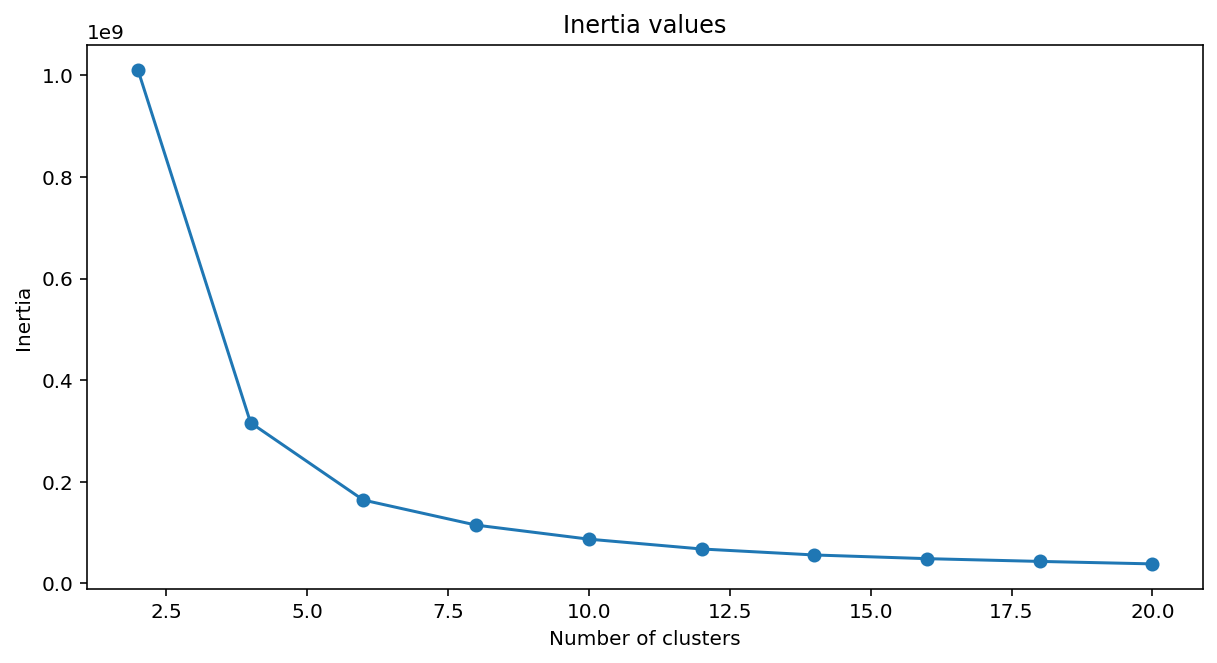

In [11]:
plt.figure(figsize=[10,5])
plt.plot(clusters_num, inertia)
plt.scatter(clusters_num, inertia)
plt.title('Inertia values')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

Now, we define the elbow - the point that "breaks" the inertia line; the break point stands for the point after which the inertia begin to decrease linearly. (The lower value of inertia, the bigger number of clusters and the image is more detailed).

We know that the ideal number of clusters tends to fall at the elbow and in our case this value will be 6 with inertia close to the value of 0.2. In order to verify this result, we will plot the pictures and observe how they change with successive number of clusters, which stand for the number of unique colours present on the simplified image.

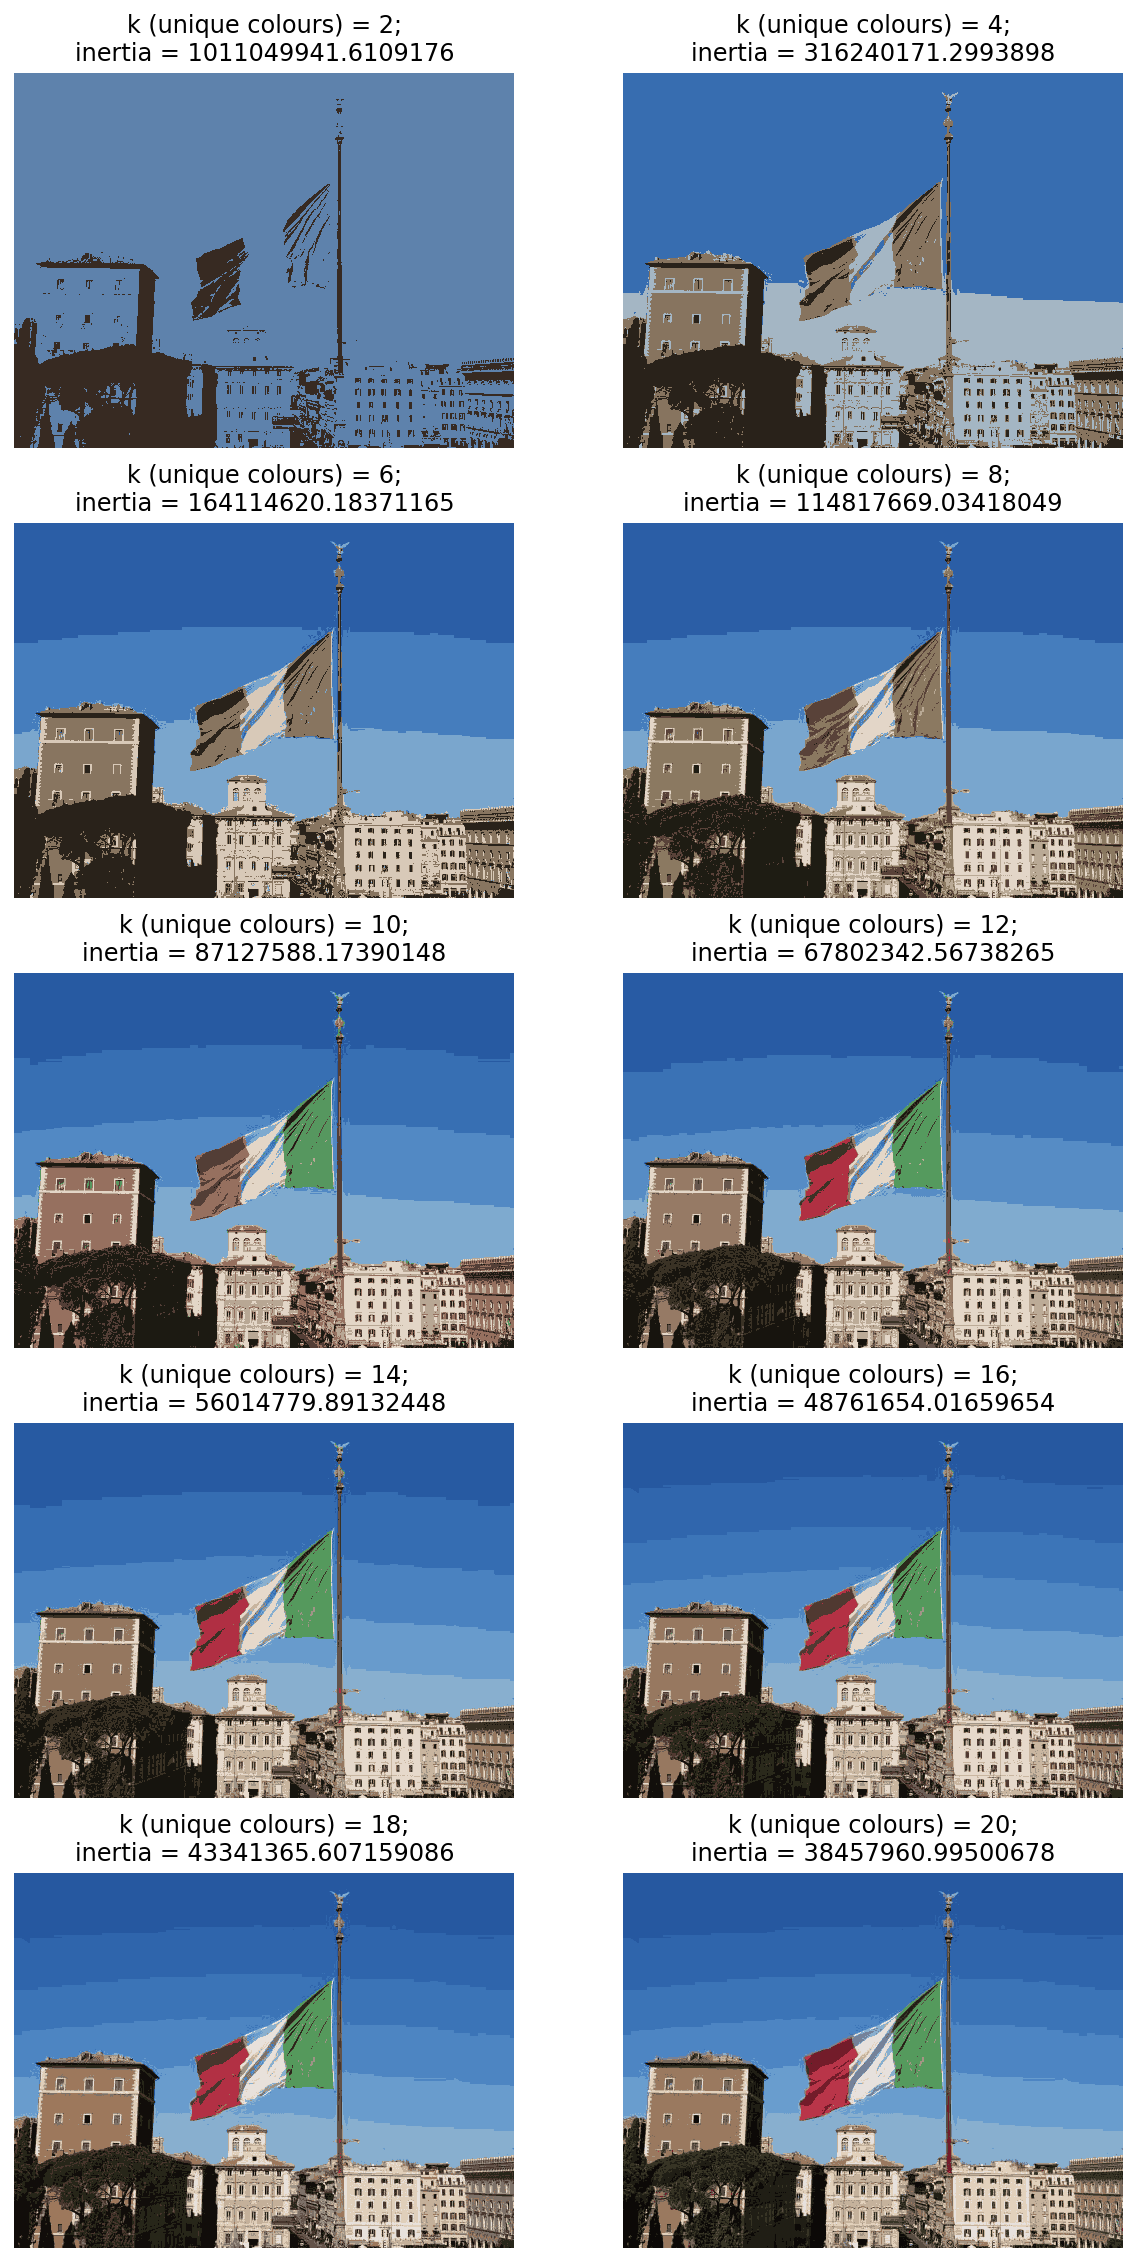

In [12]:
plt.figure(figsize=[10,20])
for i in range(len(clusters_num)):
    plt.subplot(5,2,i+1)
    plt.imshow(simplified_photos[i])
    plt.title(f'k (unique colours) = {clusters_num[i]};\ninertia = {inertia[i]}')
    plt.axis('off');

### Insight and key findings
We can notice that starting from number of clusters equal to 6, the shapes on the image begin to be easily distinguishable, but the colours are not clearly visible. Because of this, we have to adjust our primary evaluation of clusters_num=6 as our best choice and change it to clusters_num=12 as with 12 clusters our image do not lose any principal characteristics (shapes and colours and visible) and the photo's major features are preserved. 

It worth noticing that even with clusters_num=10 not only the colours start to be distinguishable but we may struggle to interpret correctly the flag. We can clearly recognize the white and green colours but the third one is not so evident. It can be both red or orange, which means that the flag may be Italian or Irish. Because of that, in order to avoid ambiguity, it is necessary to choose the higher number of clusers, i.e. 12.

### Possible next steps
The K-means clustering algorithm gives us the possibility to manipulate the number of clusters (unique colours) we want to have on our picture. In case we would need a more detailed image, we can add more clusters as it will result in more colours on our photo and more features from the input phote preserved as well.

We can test different clusters_num parameter values and, for instance, conduct an analysis of what colour's shades become visible as we successfully add more and more clusters (if we get more shades of red, green, or blue).